# _Who Will Win Their Next Match_
### _The Pokemon Challenge_
### Author: Jean-Sebastien Provost 


In [3]:
setwd("/Users/jean-sebastienprovost/Desktop/coursera/kaggle/pokemon_challenge/")

## INTRODUCTION
The name "Pokémon" comes from the contraction of "pocket" and "monster", and was first introduced in 1989 when the first video game was released on the GameBoy. The goal of the game was to collect the different species of Pokemons, and to train some of your creatures in order to compete against other players. The outcome of a fight could be influenced by the characteristics of the two Pokemon opponents. In this notebook, we will explore these characteristics as published on the Kaggle website ("https://www.kaggle.com/terminus7/pokemon-challenge"). This journey will include two parts: an exploratory and a prediction parts. Below we will explore the characteristics of the different Pokemons and perform data analysis in order to extract specific information about this sample. Further, we will perform feature engineering which will be extremely useful in the second part where we will perform machine learning in order to predict the potential winner of each fight.

In [8]:
#Loading libraries
  library(dplyr)
  library(corrplot)
  library(ggplot2)
  library(data.table)
  library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [9]:
# Loading the data
  combats = read.csv("combats.csv", na.strings = c(""))
  pokemon = read.csv("pokemon.csv", na.strings = c(""))
  test_data = read.csv("tests.csv", na.strings = c(""))
  str(pokemon)
  summary(pokemon)

'data.frame':	800 obs. of  12 variables:
 $ X.        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name      : Factor w/ 799 levels "Abomasnow","Abra",..: 69 308 745 453 88 89 87 419 420 668 ...
 $ Type.1    : Factor w/ 18 levels "Bug","Dark","Dragon",..: 10 10 10 10 7 7 7 7 7 18 ...
 $ Type.2    : Factor w/ 18 levels "Bug","Dark","Dragon",..: 14 14 14 14 NA NA 8 3 8 NA ...
 $ HP        : int  45 60 80 80 39 58 78 78 78 44 ...
 $ Attack    : int  49 62 82 100 52 64 84 130 104 48 ...
 $ Defense   : int  49 63 83 123 43 58 78 111 78 65 ...
 $ Sp..Atk   : int  65 80 100 122 60 80 109 130 159 50 ...
 $ Sp..Def   : int  65 80 100 120 50 65 85 85 115 64 ...
 $ Speed     : int  45 60 80 80 65 80 100 100 100 43 ...
 $ Generation: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Legendary : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...


       X.                           Name         Type.1         Type.2   
 Min.   :  1.0   Abomasnow            :  1   Water  :112   Flying  : 97  
 1st Qu.:200.8   Abra                 :  1   Normal : 98   Ground  : 35  
 Median :400.5   Absol                :  1   Grass  : 70   Poison  : 34  
 Mean   :400.5   Accelgor             :  1   Bug    : 69   Psychic : 33  
 3rd Qu.:600.2   Aegislash Blade Forme:  1   Psychic: 57   Fighting: 26  
 Max.   :800.0   (Other)              :794   Fire   : 52   (Other) :189  
                 NA's                 :  1   (Other):342   NA's    :386  
       HP             Attack       Defense          Sp..Atk      
 Min.   :  1.00   Min.   :  5   Min.   :  5.00   Min.   : 10.00  
 1st Qu.: 50.00   1st Qu.: 55   1st Qu.: 50.00   1st Qu.: 49.75  
 Median : 65.00   Median : 75   Median : 70.00   Median : 65.00  
 Mean   : 69.26   Mean   : 79   Mean   : 73.84   Mean   : 72.82  
 3rd Qu.: 80.00   3rd Qu.:100   3rd Qu.: 90.00   3rd Qu.: 95.00  
 Max.   :255

First, we will rename some of our variables to make them more usable (e.g., "Sp..Atk" => "sp_atk"). Furthermore, we will transform the integer variables into numerical variables in order to perform statistics on them. Finally, we will convert the name variable from a factor to a character variable.

In [10]:
#Data cleaning and Feature preprocessing/engineering
  pokemon$Generation <- as.factor(pokemon$Generation)
  names(pokemon)[names(pokemon) == "Sp..Atk"] <- "sp_atk"
  names(pokemon)[names(pokemon) == "Sp..Def"] <- "sp_def"
  pokemon$HP <- as.numeric(pokemon$HP)
  pokemon$Attack <- as.numeric(pokemon$Attack)
  pokemon$Defense <- as.numeric(pokemon$Defense)
  pokemon$sp_atk  <- as.numeric(pokemon$sp_atk)
  pokemon$sp_def <- as.numeric(pokemon$sp_def)
  pokemon$Name <- as.character(pokemon$Name)
  names(pokemon)[names(pokemon)=="X."] <- "id"
  pokemon$id <- as.factor(pokemon$id)

From the summary, we can see some missing data in the name and Type.2 features. Regarding the latter, we do not want to remove any observations since each observation corresponds to a match between two pokemons could have a major incidence on our prediction later on. Furthermore, because this particular variable is a factor, we cannot interpolate the value. Therefore, we will remove the entire feature from our dataset. Secondly, we have a name missing. Since we only have one name missing, let us give a name to this pokemon. It will be easy to track down this pokemon if all pokemons participated in this fight.

In [13]:
# Since the values of the missing values is directly linked to our predictive outcome,
# we will remove the feature, and not the observation
  pokemon <- subset(pokemon, select=-Type.2)

# We have another missing value as the name of 1 pokemon, however this will not change our variables of interest.
# Therefore we will keep this observation, but let's give it a new name :-)
  pokemon[is.na(pokemon$Name),]
  pokemon$Name[63] <- "BigPoke"


,id,Name,Type.1,HP,Attack,Defense,sp_atk,sp_def,Speed,Generation,Legendary
63,63,NA,Fighting,65,105,60,60,70,95,1,False


From the raw data that we have so far, let's see if there is a relationship between whether a pokemon is legendary and its attributes like attack, defense, speed of an attack, speed of a defense, and its overall speed

TableGrob (3 x 3) "arrange": 7 grobs
  z     cells    name                grob
1 1 (2-2,1-1) arrange      gtable[layout]
2 2 (2-2,2-2) arrange      gtable[layout]
3 3 (2-2,3-3) arrange      gtable[layout]
4 4 (3-3,1-1) arrange      gtable[layout]
5 5 (3-3,2-2) arrange      gtable[layout]
6 6 (3-3,3-3) arrange      gtable[layout]
7 7 (1-1,1-3) arrange text[GRID.text.359]

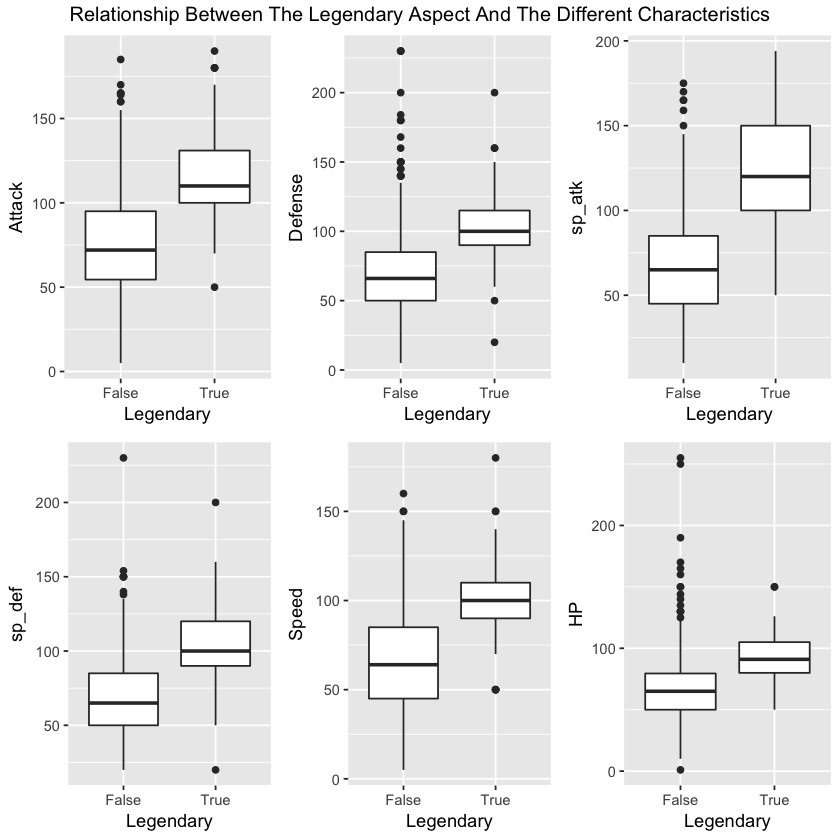

In [15]:
box_attack = ggplot(pokemon, aes(x=Legendary, y=Attack)) + geom_boxplot()
box_defense = ggplot(pokemon, aes(x=Legendary, y=Defense)) + geom_boxplot()
box_sp_attack = ggplot(pokemon, aes(x=Legendary, y=sp_atk)) + geom_boxplot()
box_sp_defense = ggplot(pokemon, aes(x=Legendary, y=sp_def)) + geom_boxplot()
box_speed = ggplot(pokemon, aes(x=Legendary, y=Speed)) + geom_boxplot()
box_hp = ggplot(pokemon, aes(x=Legendary, y=HP)) + geom_boxplot()
box_legendary=grid.arrange(box_attack, box_defense, box_sp_attack, box_sp_defense, box_speed, box_hp, nrow=2, ncol=3, top=("Relationship Between The Legendary Aspect And The Different Characteristics"))
box_legendary

This previous figure suggests a positive relationship between the Legendary aspect of a pokemon and the listed characteristics. Hence, a legendary pokemon will show a greater score for each of these characteristics than a non-legendary pokemon.

Now, let's take a closer look at the potential relationship between these same characteristics and the generation associated for the pokemon. We could hypothesize that more recent pokemon could have better characteristics

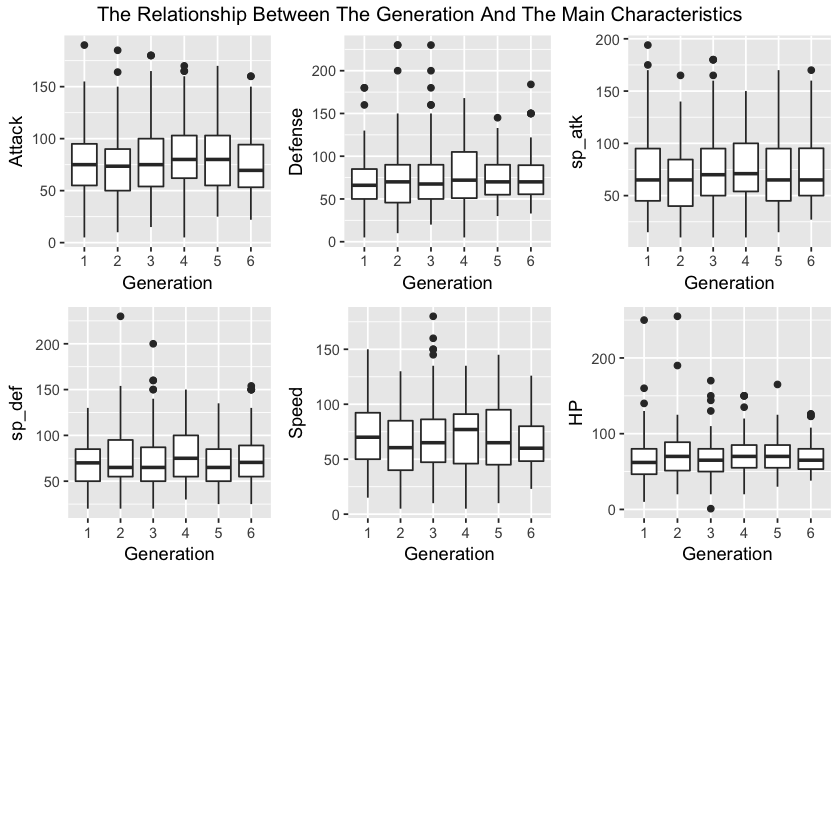

In [16]:
box_attack = ggplot(pokemon, aes(x=Generation, y=Attack)) + geom_boxplot()
box_defense = ggplot(pokemon, aes(x=Generation, y=Defense)) + geom_boxplot()
box_sp_attack = ggplot(pokemon, aes(x=Generation, y=sp_atk)) + geom_boxplot()
box_sp_defense = ggplot(pokemon, aes(x=Generation, y=sp_def)) + geom_boxplot()
box_speed = ggplot(pokemon, aes(x=Generation, y=Speed)) + geom_boxplot()
box_hp = ggplot(pokemon, aes(x=Generation, y=HP)) + geom_boxplot()

box_generation = grid.arrange(box_attack, box_defense, box_sp_attack, box_sp_defense, box_speed, box_hp, nrow=3, ncol=3, top="The Relationship Between The Generation And The Main Characteristics")


We could have hypothesized a relationship between the generation of a pokemon and the increase in one (or many) characteristics. However as our figure above shows, the median/mean seems very similar for all characteristics throughout all generations.

Furthermore, let us look at the relationship between the different characteristics, namely the attack, defense, speed attack, speed defense, speed, and health power.

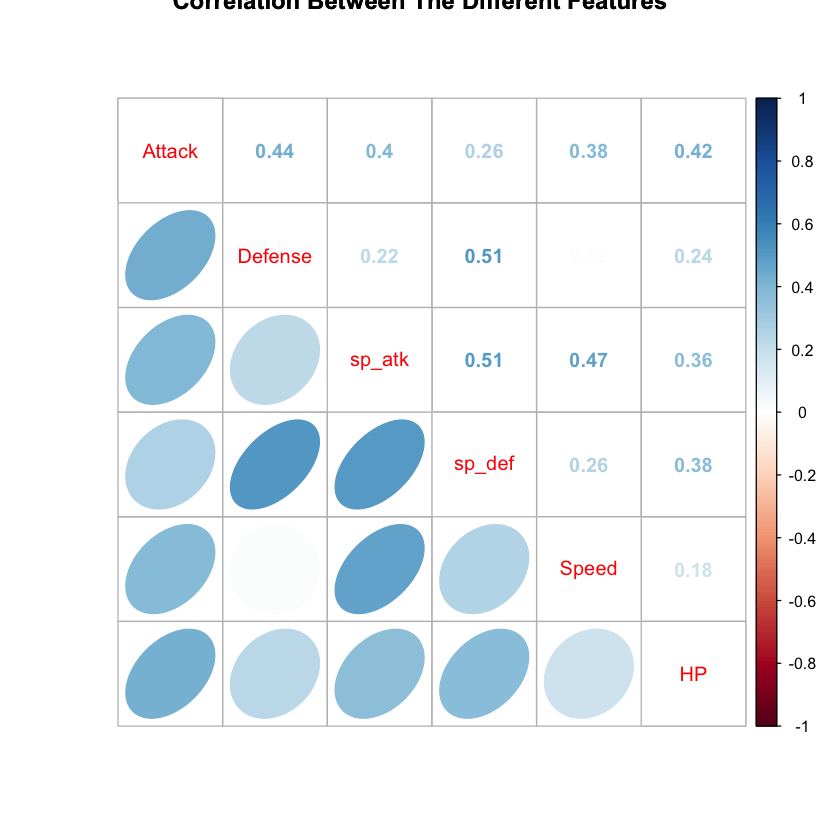

In [17]:
features = pokemon[c("Attack", "Defense", "sp_atk", "sp_def", "Speed", "HP")]
features$Speed = as.numeric(features$Speed)
M = cor(features)
corrplot.mixed(M, lower = "ellipse", upper = "number", title = "Correlation Between The Different Features")

Now let us create some new features that will help us understand better the performance for each pokemon. First it is important to understand how the features could intereact with whether a pokemon is victorious or defeated during a match. With the information given regarding the outcome of a series of matches,  we can try to link the outcome of a match with specific features. Furthermore, we can extract new features regarding the probability of winning a match from past history. 

First we will create a new column in the "winner" dataset listing the number of wins each pokemon has so far. We will then add this column to our pokemon dataframe.

In [18]:
# Adding a column for the number of wins per pokemon in the pokemon dataframe
  winner <- as.data.frame(table(combats$Winner))
  names(winner)[names(winner) == "Var1"] <- "id"
  pokemon <- merge(pokemon, winner, by="id", all = TRUE)
  pokemon$Freq[is.na(pokemon$Freq)] <- 0
  names(pokemon)[names(pokemon) == "Freq"] <- "wins"
  rm(winner)

Then we will extract the probability of winning when a pokemon attacks first versus when it defends initially.
We will extract the number of fights, number of wins following a first attack, and the number of wins defending first.
If no matches were played before, then we will set the probabiblity of winning at 0.5.

In [19]:
for (i in 1:nrow(pokemon)){
    pokemon$first_atk[i] = sum(combats$First_pokemon == i)
    pokemon$first_def[i] = sum(combats$Second_pokemon == i)
    pokemon$matches[i] = pokemon$first_atk[i] + pokemon$first_def[i]
    pokemon$w_atkfirst[i] = sum(combats$First_pokemon == i & combats$Winner == i) 
    pokemon$w_atksecond[i] = sum(combats$Second_pokemon == i & combats$Winner == i)
    pokemon$prob_w_atkfirst[i] = pokemon$w_atkfirst[i] / pokemon$wins[i]
    pokemon$prob_w_atksecond[i] = pokemon$w_atksecond[i] / pokemon$wins[i]
}
  # For pokemons that did not fight before, we assign the probability of 0.5 for attacking first and attacking second 
    pokemon$prob_w_atkfirst[is.nan(pokemon$prob_w_atkfirst)] <- 0.5
    pokemon$prob_w_atksecond[is.nan(pokemon$prob_w_atksecond)] <- 0.5
    pokemon$probWinning = pokemon$wins/pokemon$matches
    pokemon$probWinning[is.na(pokemon$probWinning)] <- 0.5

With the data that we have, we can look for the potential relationship between the probability of winning and the various features such as Attack, Defense, Health Power, Speed of Attack, Speed of Defense, and Speed.

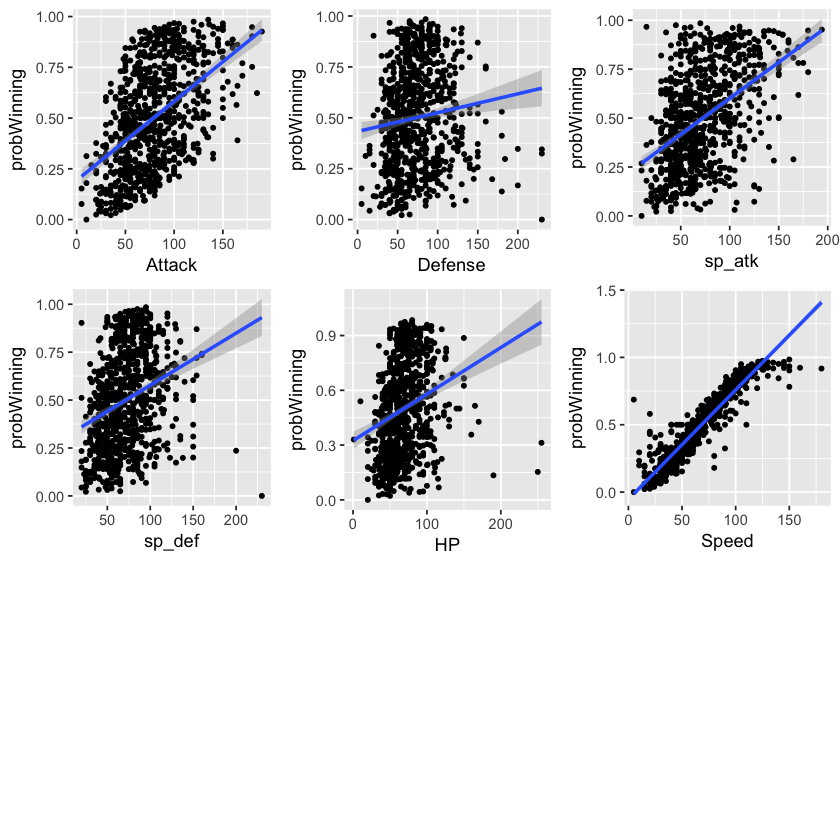

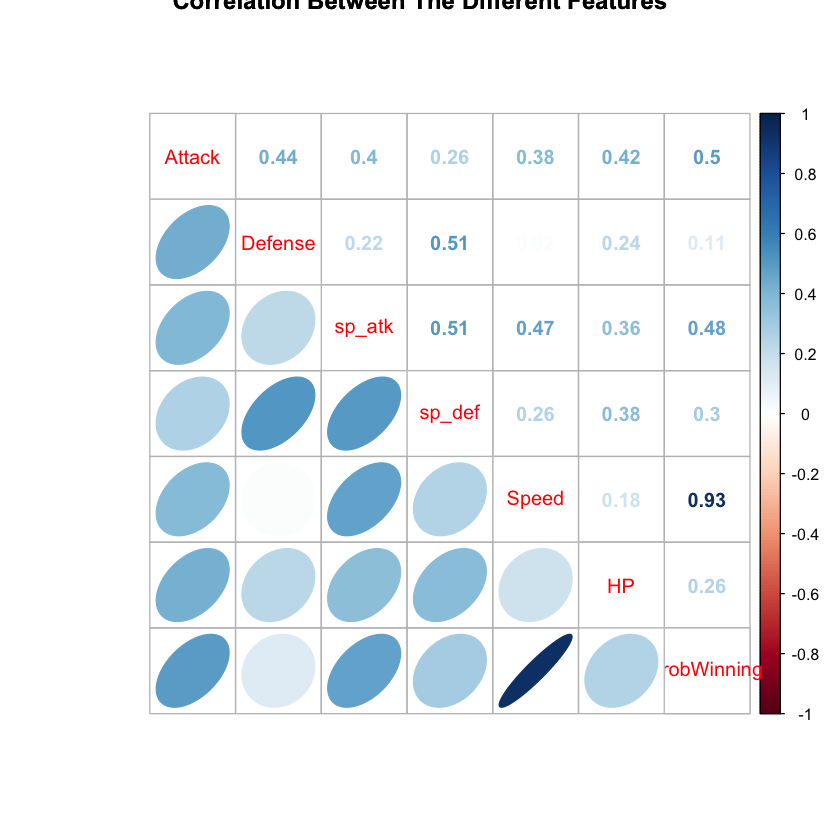

In [20]:
plot_attack = ggplot(pokemon, aes(x=Attack, y=probWinning)) + geom_point(size=1) + geom_smooth(method = "lm")
plot_defense = ggplot(pokemon, aes(x=Defense, y=probWinning)) + geom_point(size=1) + geom_smooth(method = "lm")
plot_speed = ggplot(pokemon, aes(x=Speed, y=probWinning)) + geom_point(size=1) + geom_smooth(method = "lm")
plot_sp_atk = ggplot(pokemon, aes(x=sp_atk, y=probWinning)) + geom_point(size=1) + geom_smooth(method = "lm")
plot_sp_def = ggplot(pokemon, aes(x=sp_def, y=probWinning)) + geom_point(size=1) + geom_smooth(method = "lm")
plot_hp = ggplot(pokemon, aes(x=HP, y=probWinning)) + geom_point(size=1) + geom_smooth(method = "lm")
grid.arrange(plot_attack, plot_defense, plot_sp_atk, plot_sp_def, plot_hp, plot_speed, nrow=3, ncol=3)

features = pokemon[c("Attack", "Defense", "sp_atk", "sp_def", "Speed", "HP", "probWinning")]
features$Speed = as.numeric(features$Speed)
M = cor(features)
corrplot.mixed(M, lower = "ellipse", upper = "number", title = "Correlation Between The Different Features")

From the previous figures, we can observe a very strong relationship between the probability of winning and speed (r = 0.93). We can hypothesize that this feature will play a crucial role in predicting the outcome of a fight.

Since we are going to try to predict the winner of the pokemon attacking first, we will add a new variable "win" that will consist of a "1" if the first pokemon wins, and a "0" if its loses.

In [21]:
combats$win = 0
  combats[combats$First_pokemon == combats$Winner,]$win <- 1
  combats[combats$Second_pokemon == combats$Winner,]$win <- 0
  combats$win <- as.factor(combats$win)
  
  # Adding Loser results to dataframe
  for (i in 1:nrow(combats)){ 
    if (combats$win[i] == 1) {combats$Loser[i] <- combats$Second_pokemon[i]} else {combats$Loser[i] <- combats$First_pokemon[i]}
    }

Before we continue with our main interest, we would like to see if there is a relationship between probability of winning a fight and one or more features. To do that, we will merge the characteristics of the winning pokemon with the combat data frame.

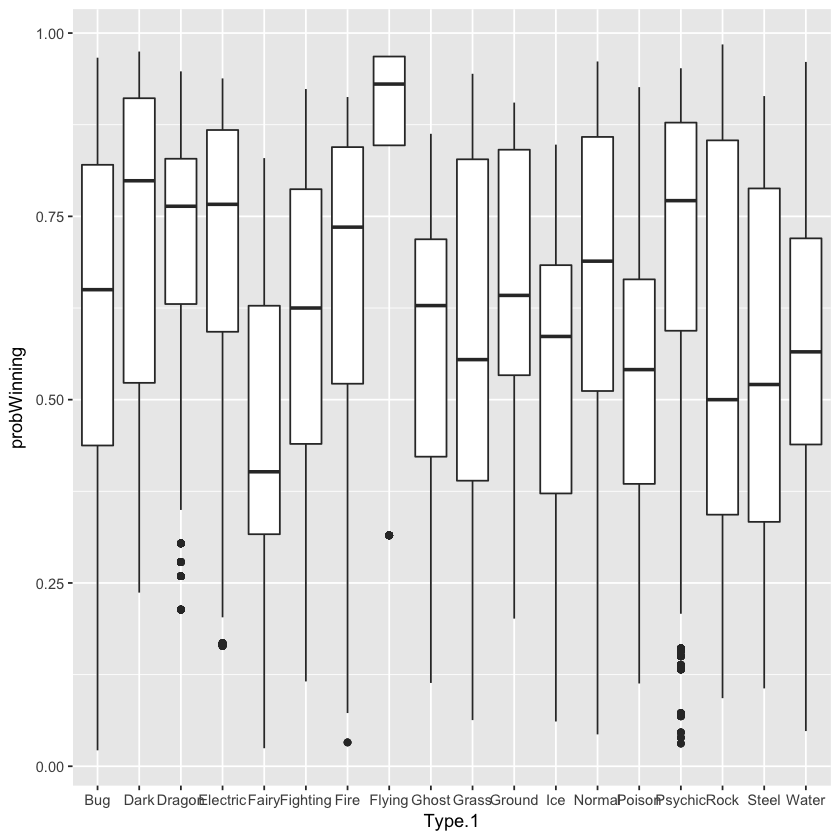

In [23]:
# Merging the two dataframes into a new temporary one
  tmp = merge(combats, pokemon, by.x = "Winner", by.y = "id", all.x = TRUE )
  tmp$Winner = as.factor(tmp$Winner)
  tmp = unique(tmp)
  tmp = tmp[c("Name", "Type.1", "HP", "Attack", "Defense", "sp_atk", "sp_def", "Speed", "Generation", "Legendary", "first_atk", "first_def", "matches", "prob_w_atkfirst", "prob_w_atksecond", "probWinning")]
  plot_probWin_type = ggplot(tmp, aes(x=Type.1, y=probWinning)) + geom_boxplot()
plot_probWin_type


Finally we will combine the information from each pokemon with the outcome of each fight by simply merging the two dataframes based on the "id" from the combat dataframe and "Winner" from the pokemon dataframe


In [25]:
new_df <- merge(combats, pokemon, by.x = "Winner", by.y = "id")   

To allow us to calculate the difference (i.e., ratio) for each feature between the winner and the loser, we will add the characteristics of each pokemon for each match that had occurred previously. To avoid any confusion, we will make sure to rename each feature with the proper prefix ("w" or "l"). In other words, the prefix "w_" will be added for the pokemon that won that specific fight, and the prefix "l_" for a loss. 

In [26]:
# Convert the names of the columns for the winner
  setnames(new_df, old=c("Name", "Type.1", "Generation", "Legendary", "sp_atk", "sp_def", "Speed", "wins", "first_atk", "first_def", "matches", "HP", "Attack", "Defense", "w_atkfirst", "w_atksecond", "prob_w_atkfirst", "prob_w_atksecond", "probWinning"),
         new=c("w_name", "w_Type1", "w_Generation", "w_Legendary", "w_sp_atk", "w_sp_def", "w_Speed", "w_wins", "w_firstatk", "w_firstdef", "w_matches", "w_HP", "w_attack", "w_defense", "w_watkfirst", "w_atksecond", "w_probwatkfirst", "w_probwsecond", "w_probWinning"))

head(new_df)

Winner,First_pokemon,Second_pokemon,win,Loser,w_name,w_Type1,w_HP,w_attack,w_defense,⋯,w_Legendary,w_wins,w_firstatk,w_firstdef,w_matches,w_watkfirst,w_atksecond,w_probwatkfirst,w_probwsecond,w_probWinning
1,374,1,0,374,Bulbasaur,Grass,45,49,49,⋯,False,37,70,63,133,12,25,0.3243243,0.6756757,0.2781955
1,323,1,0,323,Bulbasaur,Grass,45,49,49,⋯,False,37,70,63,133,12,25,0.3243243,0.6756757,0.2781955
1,199,1,0,199,Bulbasaur,Grass,45,49,49,⋯,False,37,70,63,133,12,25,0.3243243,0.6756757,0.2781955
1,433,1,0,433,Bulbasaur,Grass,45,49,49,⋯,False,37,70,63,133,12,25,0.3243243,0.6756757,0.2781955
1,733,1,0,733,Bulbasaur,Grass,45,49,49,⋯,False,37,70,63,133,12,25,0.3243243,0.6756757,0.2781955
1,1,684,1,684,Bulbasaur,Grass,45,49,49,⋯,False,37,70,63,133,12,25,0.3243243,0.6756757,0.2781955


In [27]:
# Merging the information from the losing pokemon  
  final_pokemon <- merge(new_df, pokemon, by.x = "Loser", by.y = "id")
  
# Renaming the features with refix "l_" identifying the loser pokemon features for this observation (e.g., match)  
  setnames(final_pokemon, old=c("Name", "Type.1", "Generation", "Legendary", "sp_atk", "sp_def", "Speed", "wins", "first_atk", "first_def", "matches", "HP", "Attack", "Defense", "w_atkfirst", "w_atksecond.y", "prob_w_atkfirst", "prob_w_atksecond", "probWinning"),
         new=c("l_name", "l_Type1", "l_Generation", "l_Legendary", "l_sp_atk", "l_sp_def", "l_Speed", "l_wins", "l_firstatk", "l_firstdef", "l_matches", "l_HP", "l_attack", "l_defense", "l_watkfirst", "l_atksecond", "l_probwatkfirst", "l_probwsecond", "l_probWinning"))

# Saving the latest dataframe
  write.csv(final_pokemon, "final_pokemon.csv")